# Example 9.20: Exact intervals for quantiles
General comments:
To quickly get started with the example, we used Open AI's Chat GPT to translate code.
The "R" code for exaple 9.20 came from https://people.kth.se/~hult/riskbook.html. We then asked it to translate the code into python 3, we then started an jupiter notebook, and split the code into cells.

The prompt given to Chat GPT:
We want you to translate the following R code into a python3 code, note that you are allowed to improve the code, by for example changing the two for loops, into one for loop with vector operations instead. Here is the code:

---Example 9.20 R code written out---"

Now that we had received a file "Example 9.20.ipynb" from Chat GPT, we could first make sure that the results/code are correct.
It was for the most part correct, so we only added comments (markdown cells) to explain the procedure, results and our interpretation.

In [6]:
import numpy as np
from scipy.stats import norm, chi2, t
from scipy.linalg import cholesky

In [7]:

# Parameters
N = 10**5
n = 1000
defr = 3
depr = 0.05
runlen = 1000

# Covariance matrices and their Cholesky decomposition
covmat1 = np.eye(n)
covmat2 = 0.9 * np.eye(n) + 0.1 * np.ones((n, n))
cholmat = cholesky(covmat2, lower=False).T

# Quantiles
q1 = norm.ppf(depr)
q2 = t.ppf(depr, df=defr)

In [8]:
# Initialize results matrix
resmat = np.zeros((4, N))

# Main computation loop
for i in range(N // runlen):
    # Generate radial values and normal samples
    radialvals = np.sqrt(defr) / np.sqrt(chi2.rvs(defr, size=runlen))
    normsampledata = np.random.multivariate_normal(np.zeros(n), covmat1, size=runlen)
    
    # Vectorized computations
    resmat[0, i * runlen:(i + 1) * runlen] = np.sum(normsampledata < q1, axis=1)
    resmat[1, i * runlen:(i + 1) * runlen] = np.sum(np.dot(normsampledata, cholmat.T) < q1, axis=1)
    resmat[2, i * runlen:(i + 1) * runlen] = np.sum(radialvals[:, np.newaxis] * normsampledata < q2, axis=1)
    resmat[3, i * runlen:(i + 1) * runlen] = np.sum(radialvals[:, np.newaxis] * np.dot(normsampledata, cholmat.T) < q2, axis=1)

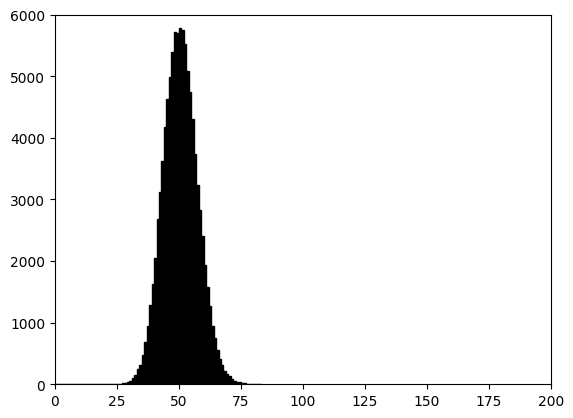

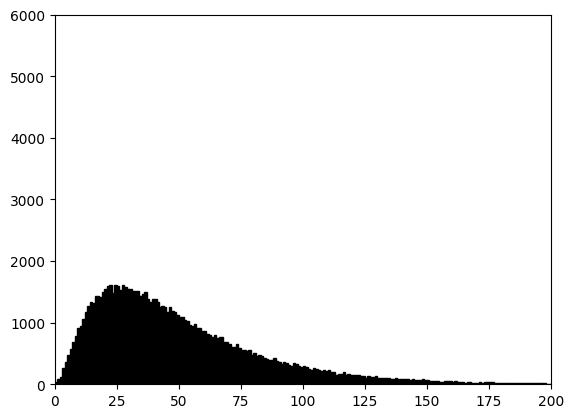

In [9]:
# Histograms
import matplotlib.pyplot as plt

plt.figure()
plt.hist(resmat[0, :], bins=np.arange(0, np.max(resmat[0, :]) + 1), color='black', edgecolor='black')
plt.xlim(0, 200)
plt.ylim(0, 6000)
plt.show()

plt.figure()
plt.hist(resmat[1, :], bins=np.arange(0, np.max(resmat[1, :]) + 1), color='black', edgecolor='black')
plt.xlim(0, 200)
plt.ylim(0, 6000)
plt.show()

As stated in the book, we can see that for the first plot (Gaussian with no correlation) we see that it is equal to independence, since it is centered around 50 (which is the mean 1000*0.05). Now with p=0.1 we see that it is less centered and this means we can see the correlation between obligors. 

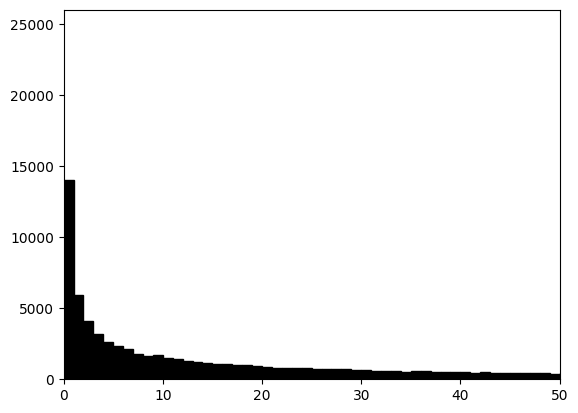

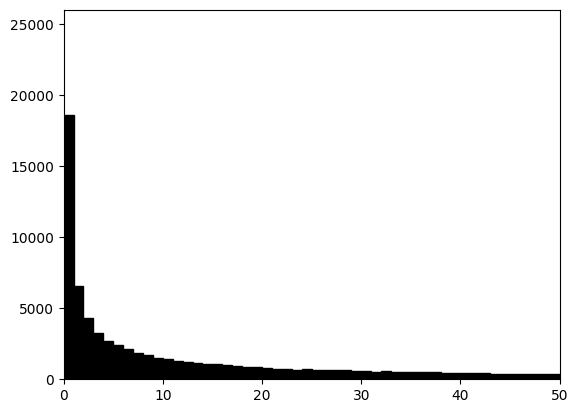

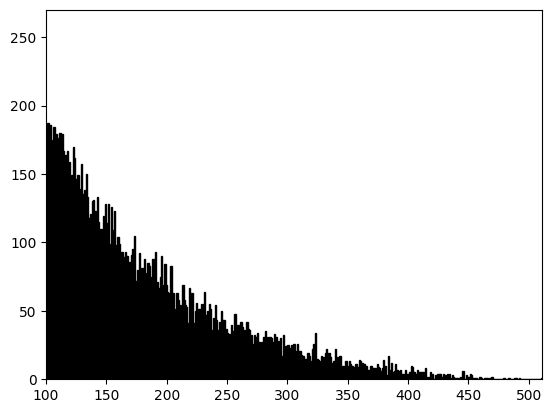

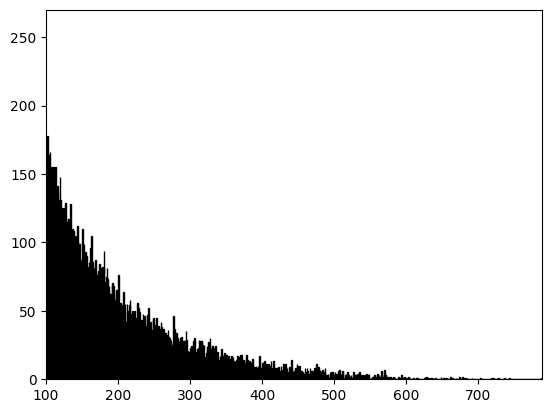

In [10]:

plt.figure()
plt.hist(resmat[2, :], bins=np.arange(0, np.max(resmat[2, :]) + 1), color='black', edgecolor='black')
plt.xlim(0, 50)
plt.ylim(0, 26000)
plt.show()

plt.figure()
plt.hist(resmat[3, :], bins=np.arange(0, np.max(resmat[3, :]) + 1), color='black', edgecolor='black')
plt.xlim(0, 50)
plt.ylim(0, 26000)
plt.show()

plt.figure()
plt.hist(resmat[2, :], bins=np.arange(100, np.max(resmat[2, :]) + 1), color='black', edgecolor='black')
plt.xlim(100, np.max(resmat[2, :]))
plt.ylim(0, 270)
plt.show()

plt.figure()
plt.hist(resmat[3, :], bins=np.arange(100, np.max(resmat[3, :]) + 1), color='black', edgecolor='black')
plt.xlim(100, np.max(resmat[3, :]))
plt.ylim(0, 270)
plt.show()


in the first two plots, we can see that for the student t distribution having correlation = 0, it does not equal independence. This is seen as the variablity is larger than for the gaussian with p=0. However, even if there is independence, the effect of changing p=0.1, incerases even more, this is something we can see as the probablility for extreme values increases. The last two plots, are of the same student t distributed values, however, we have "zoomed" in on the tail of the distribution to see the effects of the correlation parameter even more clearly.